# Initial Exploration

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt


etymology = pd.read_csv('etymology.csv')
display(etymology)

,term_id,lang,term,reltype,related_term_id,related_lang,related_term,position,group_tag,parent_tag,parent_position
0,8_rYLlLyVOKJlGFPZIvpVA,English,thesaurus,group_derived_root,NaN,NaN,NaN,0.0,0IIU6TlkSA2D7dg1PfxGOw,NaN,NaN
1,8_rYLlLyVOKJlGFPZIvpVA,English,thesaurus,borrowed_from,fhl-sdgwXaWvYD8CgaKXpQ,Latin,thēsaurus,0.0,NaN,0IIU6TlkSA2D7dg1PfxGOw,0.0
2,8_rYLlLyVOKJlGFPZIvpVA,English,thesaurus,derived_from,7Rf1835bWYmlH9VnyYVbpg,Ancient Greek,θησαυρός,0.0,NaN,0IIU6TlkSA2D7dg1PfxGOw,1.0
3,8_rYLlLyVOKJlGFPZIvpVA,English,thesaurus,doublet_with,sqiifJX3XIOQ0vZ0trzRaA,English,treasure,0.0,NaN,NaN,NaN
4,iwDzanYmWxaUKbOlUy2yyQ,Latin,thesaurus,derived_from,7Rf1835bWYmlH9VnyYVbpg,Ancient Greek,θησαυρός,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1849970,C4toVEoxV2yxzuGk3jo1QA,Latin,exheredandus,etymologically_related_to,4spOj7ajVB6GdQ7QRK17KA,Latin,exhērēdō,0.0,NaN,NaN,NaN
1849971,5bjGxpwCXLeUmN6n9pMuEA,Ladino,akel,derived_from,1h0dYccGXqSskCB2Nr1AmQ,Latin,eccu,0.0,NaN,NaN,NaN
1849972,5bjGxpwCXLeUmN6n9pMuEA,Ladino,akel,etymologically_related_to,WcDU7_5aX5GyxvcKZDy05w,Latin,ille,0.0,NaN,NaN,NaN
1849973,ODnEfS8-UbSB1rmYu6Q4tQ,Pagu,akel,inherited_from,lIzEzCsoUgOgx46zs03ezg,Proto-North Halmahera,*aker,0.0,NaN,NaN,NaN


In [ ]:
etymology.columns

Index(['term_id', 'lang', 'term', 'reltype', 'related_term_id', 'related_lang',
       'related_term', 'position', 'group_tag', 'parent_tag',
       'parent_position'],
      dtype='object')

In [ ]:
df = etymology[etymology['lang'] == 'English']
engl = df.drop(['lang', 'term_id', 'related_term_id', 'position', 'group_tag', 'parent_tag', 'parent_position'], axis = 1)
display(engl)

,term,reltype,related_lang,related_term
0,thesaurus,group_derived_root,NaN,NaN
1,thesaurus,borrowed_from,Latin,thēsaurus
2,thesaurus,derived_from,Ancient Greek,θησαυρός
3,thesaurus,doublet_with,English,treasure
5,portmanteau,has_root,Proto-Indo-European,*per- (fare)
...,...,...,...,...
1849945,fragmentist,has_prefix_with_root,English,fragment
1849946,fragmentist,has_suffix,English,ist
1849955,preinstruct,has_prefix,English,pre
1849956,preinstruct,has_prefix_with_root,English,instruct


In [ ]:
engl['related_lang'].value_counts().median()
engl['reltype'].unique()

array(['group_derived_root', 'borrowed_from', 'derived_from',
       'doublet_with', 'has_root', 'group_affix_root',
       'etymologically_related_to', 'group_related_root',
       'inherited_from', 'cognate_of', 'abbreviation_of', 'clipping_of',
       'has_affix', 'is_onomatopoeic', 'compound_of',
       'has_prefix_with_root', 'has_suffix', 'has_confix', 'calque_of',
       'blend_of', 'has_prefix', 'back-formation_from',
       'learned_borrowing_from', 'unadapted_borrowing_from',
       'named_after', 'orthographic_borrowing_from', 'semantic_loan_of',
       'initialism_of', 'phono-semantic_matching_of',
       'etymologically_rel'], dtype=object)

In [ ]:
# (engl['related_lang'] != 'English')
related_counts = engl[(engl['reltype'] == 'borrowed_from')]['related_lang'].value_counts()
piechart_lst = related_counts[related_counts >= 150]
other = pd.Series({'Other': engl[(engl['reltype'] == 'borrowed_from')]['related_lang'].value_counts()[engl['related_lang'].value_counts() < 150].sum()})
piechart_series = pd.concat([piechart_lst, other])
piechart_series

,0
French,3362
Latin,2926
Spanish,998
Italian,983
Japanese,804
German,792
Middle French,656
Ancient Greek,630
Arabic,360
Russian,331


<Axes: title={'center': 'Number of English Words Borrowed from Each Language'}>

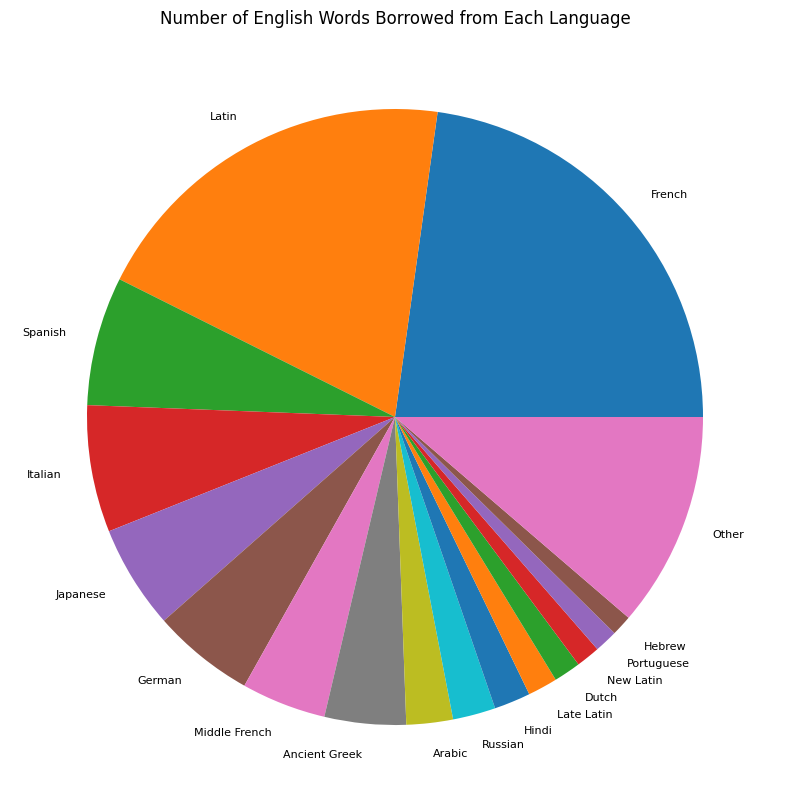

In [ ]:
piechart_series.plot.pie(figsize = (10, 10), title = 'Number of English Words Borrowed from Each Language', fontsize = 8)

In [ ]:
engl[engl['term'] == 'the']

,term,reltype,related_lang,related_term
4957,the,group_derived_root,NaN,NaN
4958,the,inherited_from,Middle English,the
4959,the,inherited_from,Old English,þē
4960,the,etymologically_related_to,Old English,sē
4961,the,group_related_root,NaN,NaN
4962,the,etymologically_related_to,Old English,sē
4963,the,etymologically_related_to,Old English,sēo
4964,the,etymologically_related_to,Old English,þæt
4965,the,etymologically_related_to,Old English,þā
4966,the,etymologically_related_to,Old English,sē


In [ ]:
freqs = pd.read_csv('unigram_freq.csv')
freqs.set_index('word', inplace = True)
freqs

,count
word,
the,23135851162
of,13151942776
and,12997637966
to,12136980858
a,9081174698
...,...
gooek,12711
gooddg,12711
gooblle,12711


In [ ]:
# engl['frequency'] = engl['term'].apply(lambda word: freqs.loc[word] if (word in freqs.index) else -1)
df = engl.set_index('term').join(freqs).sort_values('count', ascending = False).dropna(subset = ['count'])
df['freq'] = df['count'] / freqs['count'].sum()
df

,reltype,related_lang,related_term,count,freq
term,,,,,
the,group_related_root,NaN,NaN,2.313585e+10,3.933838e-02
the,etymologically_related_to,Middle English,thi,2.313585e+10,3.933838e-02
the,inherited_from,Middle English,the,2.313585e+10,3.933838e-02
the,group_derived_root,NaN,NaN,2.313585e+10,3.933838e-02
the,cognate_of,Sanskrit,sá,2.313585e+10,3.933838e-02
...,...,...,...,...,...
inhibitive,has_suffix,English,ive,1.271400e+04,2.161788e-08
unswitched,has_prefix_with_root,English,switched,1.271200e+04,2.161448e-08
unswitched,has_prefix,English,un,1.271200e+04,2.161448e-08


# Hypothesis 1

H0: There is no difference between the distribution of what languages the top 2000 loanwords have been borrowed from, the distribution of languages the top 2000-4000 loanwords have been borrowed from, and the distribution of languages loanwords other than the top 4000 have been borrowed from.

HA: There is a difference between the distribution of what languages the top 2000 loanwords have been borrowed from, the distribution of languages the top 2000-4000 loanwords have been borrowed from, and the distribution of languages loanwords other than the top 4000 have been borrowed from.


In [9]:
df = pd.read_csv('etymology.csv')
borrowed_df = df[df['reltype'] == 'borrowed_from']
borrowed_df

,term_id,lang,term,reltype,related_term_id,related_lang,related_term,position,group_tag,parent_tag,parent_position
1,8_rYLlLyVOKJlGFPZIvpVA,English,thesaurus,borrowed_from,fhl-sdgwXaWvYD8CgaKXpQ,Latin,thēsaurus,0.0,NaN,0IIU6TlkSA2D7dg1PfxGOw,0.0
7,BuO_dtS5XKenvDCLQimf5w,English,portmanteau,borrowed_from,oJ3zx8hYXials2kAAjz5gQ,French,portemanteau,0.0,NaN,Qrj8AH3fQwCGRuUYYo7Gxg,0.0
13,S2ihvAI4U8mYhlGXut0m4A,English,encyclopedia,borrowed_from,yUSPc9IAURGYDvZmqwsxkg,New Latin,encyclopaedia,0.0,NaN,x6rAKkpOQryGjwMv1K91tA,1.0
20,JN6Uml0yVsW5IXZMLr94gg,Latin,encyclopaedia,borrowed_from,cAiYCdUVXxe7CzwKH3rR1g,Ancient Greek,ἐγκυκλοπαιδεία,0.0,NaN,NaN,NaN
28,gLn6rnxoXkOzL8toyfFUxQ,English,dictionary,borrowed_from,WpjTSFgXURCSb7znC_-I0A,Medieval Latin,dictiōnārium,0.0,NaN,GiNcoHLcQrmADZExf3i-xA,0.0
...,...,...,...,...,...,...,...,...,...,...,...
467133,vJNUq7f4WliICgnVMN8t4g,English,garderobe,borrowed_from,gHVjEBOSW3SFWxKWa8CIRw,French,garde-robe,0.0,NaN,uctTe_HfRqa7zipGKg3aMg,0.0
467151,MWHZSZi1W2awJeBZ3oeDyA,English,terracotta,borrowed_from,tu7yOkagUHe3ptGJuNRUbg,Italian,terra,0.0,NaN,YtFwhkhzTmeAlPytUM4cmw,0.0
467157,Ef6rZYYDWAWYgbo8TArLPw,English,tenesmus,borrowed_from,I3gEau-9UYu5l9823bYVJA,Medieval Latin,tēnesmus,0.0,NaN,T4E-lIELTQqOM4HFg2yJxQ,0.0
467158,Ef6rZYYDWAWYgbo8TArLPw,English,tenesmus,borrowed_from,KeP6QJXrVY6l9q02Bh2xpA,Ancient Greek,τεινεσμός,0.0,NaN,T4E-lIELTQqOM4HFg2yJxQ,1.0


In [10]:
top_2000_df = borrowed_df.iloc[:2000]
top_4000_df = borrowed_df.iloc[2000:4000]
other_df = borrowed_df.iloc[4000:]

top_2000_counts = top_2000_df['related_lang'].value_counts()
top_2000_lst = top_2000_counts[top_2000_counts >= 15]
top_2000_other = pd.Series({'Other': top_2000_counts[top_2000_counts < 15].sum()})
top_2000_series = pd.concat([top_2000_lst, top_2000_other])

top_4000_counts = top_4000_df['related_lang'].value_counts()
top_4000_lst = top_4000_counts[top_4000_counts >= 15]
top_4000_other = pd.Series({'Other': top_4000_counts[top_4000_counts < 15].sum()})
top_4000_series = pd.concat([top_4000_lst, top_4000_other])

other_counts = other_df['related_lang'].value_counts()
other_lst = other_counts[other_counts >= 20]
other_other = pd.Series({'Other': other_counts[other_counts < 20].sum()})
other_series = pd.concat([other_lst, other_other])

<Axes: title={'center': 'Number of The Top 2000 English Loanwords Borrowed from Each Language'}>

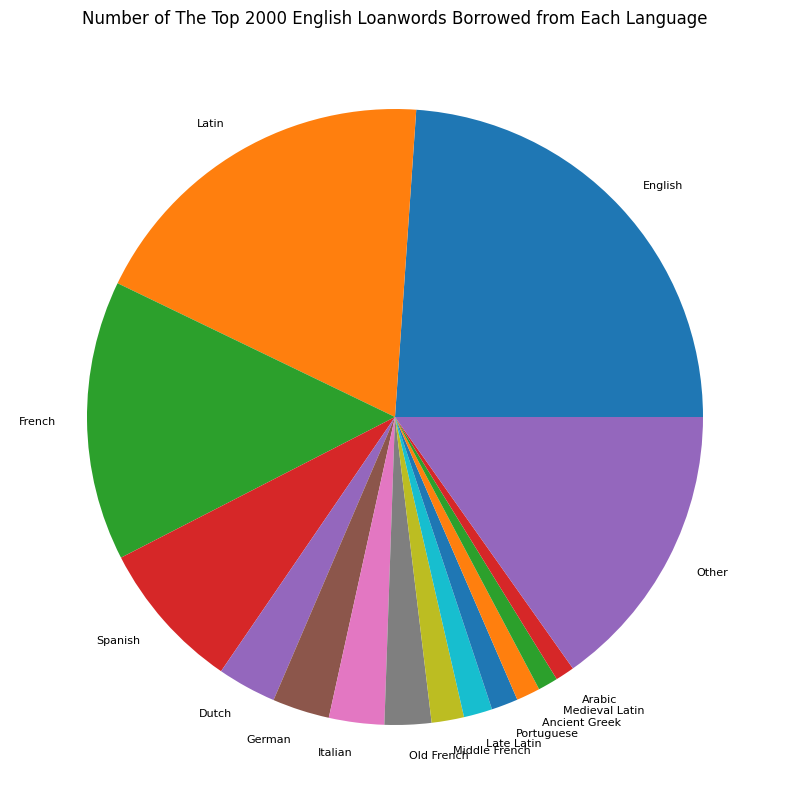

In [11]:
top_2000_series.plot.pie(figsize = (10, 10), title = 'Number of The Top 2000 English Loanwords Borrowed from Each Language', fontsize = 8)


<Axes: title={'center': 'Number of The Top 2000-4000 English Loanwords Borrowed from Each Language'}>

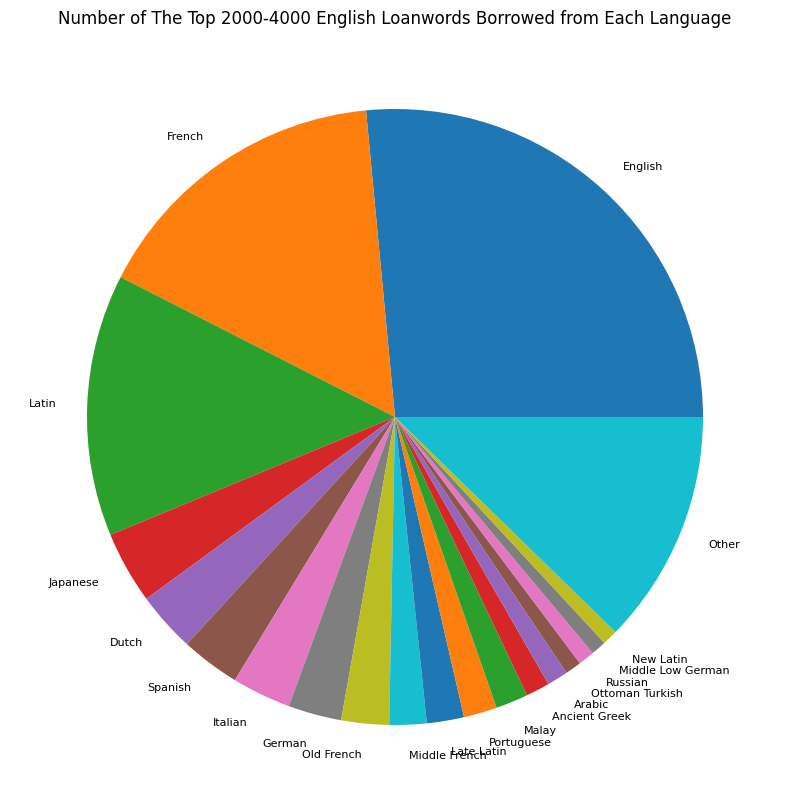

In [12]:
top_4000_series.plot.pie(figsize = (10, 10), title = 'Number of The Top 2000-4000 English Loanwords Borrowed from Each Language', fontsize = 8)


<Axes: title={'center': 'Number of English Loanwords Other Than The Top 4000 Borrowed from Each Language'}>

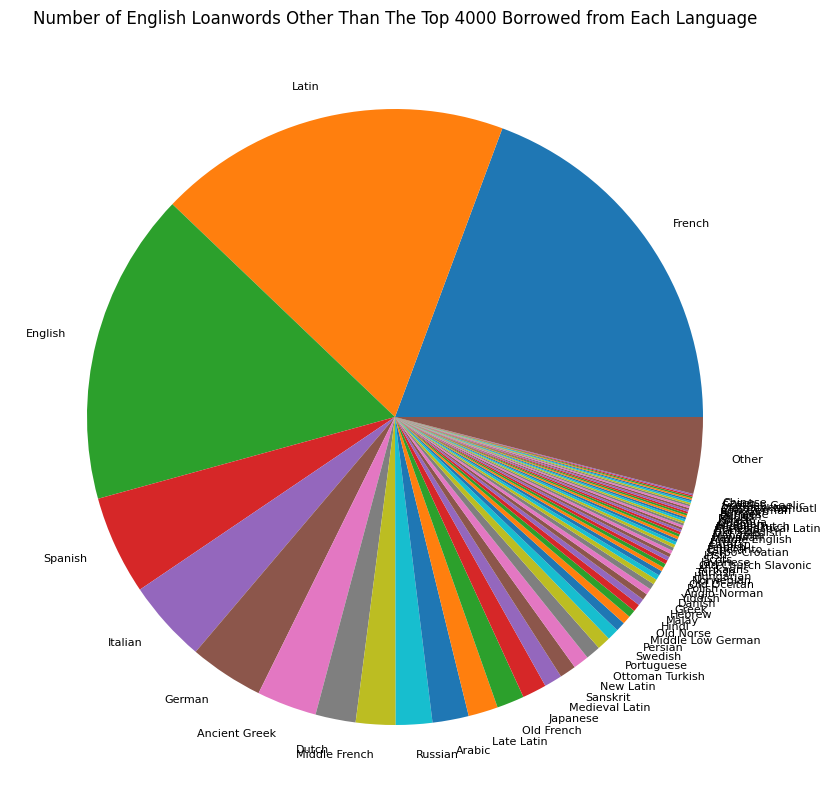

In [13]:
other_series.plot.pie(figsize = (10, 10), title = 'Number of English Loanwords Other Than The Top 4000 Borrowed from Each Language', fontsize = 8)


In [14]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
from scipy.stats import f_oneway

etymology = pd.read_csv('etymology.csv')
df = etymology[etymology['lang'] == 'English']
engl = df.drop(['lang', 'term_id', 'related_term_id', 'position', 'group_tag', 'parent_tag', 'parent_position'], axis = 1)

freqs = pd.read_csv('unigram_freq.csv')
freqs.set_index('word', inplace = True)
df = engl.set_index('term').join(freqs).sort_values('count', ascending = False).dropna(subset = ['count'])
df['freq'] = df['count'] / freqs['count'].sum()
borrowed_df = df[df['reltype'] == 'borrowed_from']
borrowed_df
group1 = borrowed_df.iloc[:2000]
group2 = borrowed_df.iloc[2000:4000]
group3 = borrowed_df.iloc[4000:]

group1_counts = group1['related_lang'].value_counts()
group2_counts = group2['related_lang'].value_counts()
group3_counts = group3['related_lang'].value_counts()

all_languages = set(group1_counts.index) | set(group2_counts.index) | set(group3_counts.index)
group1_counts = group1_counts.reindex(all_languages, fill_value=0)
group2_counts = group2_counts.reindex(all_languages, fill_value=0)
group3_counts = group3_counts.reindex(all_languages, fill_value=0)

combined = pd.DataFrame({
    'Group 1': group1_counts,
    'Group 2': group2_counts,
    'Group 3': group3_counts
}).fillna(0)


combined['Group 3']*=(2000/4138)


combined = combined.sort_values(by='Group 1')
f_oneway(combined['Group 1'], combined['Group 2'], combined['Group 3'])

F_onewayResult(statistic=2.58722525940223, pvalue=0.07619853979608285)

# Hypothesis 2

H0: There is no difference in the amount of language relations for more frequently used English words.

Ha: More frequently used English words have a significantly different (more or less) amount of language relations.


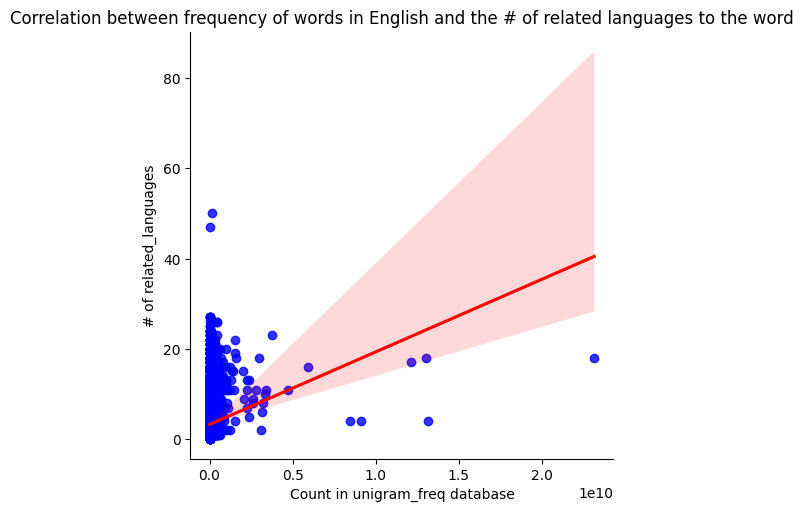

0.1160840511336227


In [6]:
#Hypothesis #2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

ety_df = pd.read_csv('etymology.csv')

uni_df = pd.read_csv('unigram_freq.csv')

english_ety = ety_df[ety_df['lang'] == 'English'].groupby('term')['related_lang'].nunique()

new_df = pd.merge(uni_df, english_ety, left_on= 'word', right_on = 'term', how = 'inner')


import seaborn as sns






scatter_df = new_df[['count', 'related_lang']]

scatter_df = scatter_df.rename(columns={'count': 'x', 'related_lang': 'y'})

correlation = scatter_df['x'].corr(scatter_df['y'])

sns.lmplot(x='x', y='y', data=scatter_df, line_kws={'color': 'red'}, scatter_kws={'color': 'blue'})

plt.xlabel('Count in unigram_freq database')
plt.ylabel('# of related_languages')
plt.title('Correlation between frequency of words in English and the # of related languages to the word')

plt.show()

print(correlation)

T-statistic: 45.65886082452005
P-value: 0.0


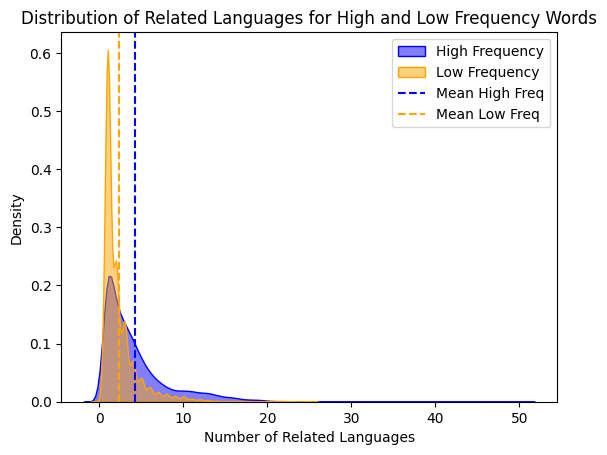

In [7]:
from scipy.stats import ttest_ind

#split the data into two groups based on the median frequency
median_freq = scatter_df['x'].median()
high_freq = scatter_df[scatter_df['x'] > median_freq]['y']
low_freq = scatter_df[scatter_df['x'] <= median_freq]['y']

t_stat, p_value = ttest_ind(high_freq, low_freq)

print(f'T-statistic: {t_stat}\nP-value: {p_value}')

sns.kdeplot(high_freq, label='High Frequency', color='blue', fill=True, alpha=0.5)
sns.kdeplot(low_freq, label='Low Frequency', color='orange', fill=True, alpha=0.5)

#Lines for means
plt.axvline(high_freq.mean(), color='blue', linestyle='--', label='Mean High Freq')
plt.axvline(low_freq.mean(), color='orange', linestyle='--', label='Mean Low Freq')

# Step 3: Customize the plot
plt.title('Distribution of Related Languages for High and Low Frequency Words')
plt.xlabel('Number of Related Languages')
plt.ylabel('Density')
plt.legend()
plt.show()

Pearson correlation: 0.2222107513686943
T-statistic: 32.38883464833428
P-value: 1.8982009995391056e-224


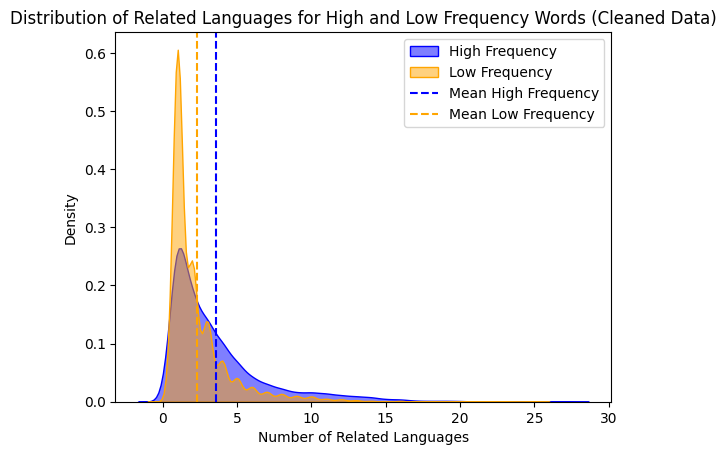

In [8]:
#Remove outliers from scatter_df
Q1 = scatter_df['x'].quantile(0.25)
Q3 = scatter_df['x'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

cleaned_scatter_df = scatter_df[(scatter_df['x'] >= lower_bound) & (scatter_df['x'] <= upper_bound)]

high_freq = cleaned_scatter_df[cleaned_scatter_df['x'] > median_freq]['y']
low_freq = cleaned_scatter_df[cleaned_scatter_df['x'] <= median_freq]['y']

#Print new stats
correlation = cleaned_scatter_df['x'].corr(cleaned_scatter_df['y'])
print(f'Pearson correlation: {correlation}')

t_stat, p_value = ttest_ind(high_freq, low_freq)
print(f'T-statistic: {t_stat}\nP-value: {p_value}')

#Re-visualizing the distribution plot
sns.kdeplot(high_freq, label='High Frequency', color='blue', fill=True, alpha=0.5)
sns.kdeplot(low_freq, label='Low Frequency', color='orange', fill=True, alpha=0.5)
plt.axvline(high_freq.mean(), color='blue', linestyle='--', label='Mean High Frequency')
plt.axvline(low_freq.mean(), color='orange', linestyle='--', label='Mean Low Frequency')

plt.title('Distribution of Related Languages for High and Low Frequency Words (Cleaned Data)')
plt.xlabel('Number of Related Languages')
plt.ylabel('Density')
plt.legend()
plt.show()

**Conclusion for Hypothesis #2:**

Based on the statistical values calculated and the visuals from the graphs, it appears that there is a very small positive correlation between word frequency and amount of unique language relations a word has. The Pearson correlation coefficient is quite small, but upon decreasing extreme outliers does slightly increase, in line with this possibility.

Additionally, the P-values indicate there is no chance the differences found are coincidence. Given the high T-statistic this aligns with the idea that we should reject the null hypothesis, and determine that there is a relationship between word frequency and etymological language relations. That being said, the shapes of the distribution graphs, even after removing extreme outliers, have several modes and are high right-skewed, so this suggests further investigation is needed to determine the meaning of these statistics/conclusions.

It is likely that there is a clear positive relationship with certain commonly used parts of speech--words like "the" come to mind--which would undoubtedly have a rich etymological history.

Overall, the testing suggests a particularly significantly significant difference, the relationship is not strong, thus other factors likely are coming into play.

# Hypothesis 3#

H0: The distribution of relationship types in the dataset is uniform

HA: The distribution of relationship types in the dataset is not uniform.
Test: chi-square test for independence


In [15]:
from scipy.stats import chi2_contingency

# load csv
df = pd.read_csv("etymology.csv")
reltype_counts = df['reltype'].value_counts()

In [ ]:
# hypothesis test
observed = reltype_counts.values
n = sum(observed)
k = len(observed)
expected = np.array([n/k] * k)
chi2, p_value = chi2_contingency([observed, expected])[0:2]

print(f"Chi-square statistic: {chi2}")
print(f"p-value: {p_value}")

Chi-square statistic: 1661554.8934974251
p-value: 0.0


Text(0, 0.5, 'Occurences')

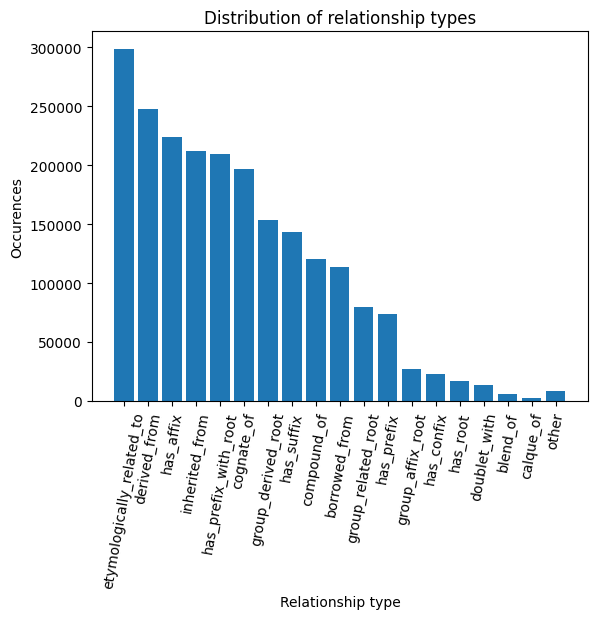

In [ ]:
# bar
other = 0
labels = []
values = []

for reltype in reltype_counts.index:
  if reltype_counts[reltype] < 2000:
    other += reltype_counts[reltype]
  else:
    labels.append(reltype)
    values.append(reltype_counts[reltype])

plt.bar([*labels, "other"], [*values, other])
plt.xticks(rotation=80)
plt.title("Distribution of relationship types")
plt.xlabel("Relationship type")
plt.ylabel("Occurences")

**Conclusion for test 3**

We reject the null hypothesis that the distribution of relationship types is uniform. There is extremely strong statistical evidence to support the alternative hypothesis that the relationship types are not equally distributed in the dataset.